In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import os
from code import *
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tqdm import tqdm

Using TensorFlow backend.


In [2]:
DATA_PATH="./data_init/"
def get_labels(path=DATA_PATH):
	labels=os.listdir(path)
	label_indices=np.arange(0,len(labels))
	return labels, label_indices, to_categorical(label_indices)

In [3]:
def speech2mfcc(file_path,max_len=11):
	wave, sr= librosa.load(file_path, mono=True, sr=None)
	wave=wave[::5]
	mfcc=librosa.feature.mfcc(wave,sr=sr)
#	print(mfcc)
	if (max_len > mfcc.shape[1]): #.shape[1], 1-->column
		pad_width=max_len-mfcc.shape[1]
		mfcc=np.pad(mfcc,pad_width=((0,0),(0,pad_width)),mode='constant')

	else:
		mfcc=mfcc[:,:max_len]
#	print(mfcc.shape)
	return mfcc

In [4]:
def save_data_to_array(path=DATA_PATH, max_len=11):
	labels,_,_=get_labels(path)

	for label in labels:
		mfcc_vectors=[]

		speechfiles=[path + label + '/' + speech for speech in os.listdir(path+'/'+label)]
		for speech in tqdm(speechfiles,"Saving vectors to label -'{}'".format(label)):
			mfcc=speech2mfcc(speech,max_len=max_len)
			print(mfcc.shape)
			mfcc_vectors.append(mfcc)
#		print(mfcc_vectors)
		np.save(label+'.npy',mfcc_vectors)

In [5]:
def get_train_test(split_ratio=0.8,random_state=42):
	labels,indices,_=get_labels(DATA_PATH)

	X=np.load(labels[0]+'.npy')
	y=np.zeros(X.shape[0])
	
	for i,label in enumerate(labels[1:]):
		x=np.load(label+'.npy')
		X=np.vstack((X,x))
		y=np.append(y,np.full(x.shape[0],fill_value=(i+1)))
	assert X.shape[0] == len(y)
#	print(X.shape)
#	print(y)
	return train_test_split(X,y,test_size=(1-split_ratio),random_state=random_state,shuffle=True)

In [57]:
save_data_to_array()

Saving vectors to label -'1':  85%|████████▍ | 22/26 [00:00<00:00, 97.05it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'10':   8%|▊         | 2/26 [00:00<00:01, 17.46it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'10':  35%|███▍      | 9/26 [00:00<00:00, 22.63it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'10':  69%|██████▉   | 18/26 [00:00<00:00, 28.94it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'10': 100%|██████████| 26/26 [00:00<00:00, 31.14it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)



Saving vectors to label -'2':  31%|███       | 8/26 [00:00<00:00, 31.68it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'2':  46%|████▌     | 12/26 [00:00<00:00, 32.69it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'2':  85%|████████▍ | 22/26 [00:00<00:00, 36.72it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'3':  12%|█▏        | 3/26 [00:00<00:00, 28.26it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'3':  38%|███▊      | 10/26 [00:00<00:00, 31.16it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'3':  69%|██████▉   | 18/26 [00:00<00:00, 33.59it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'3':  81%|████████  | 21/26 [00:00<00:00, 24.87it/s]

(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'4':   0%|          | 0/26 [00:00<?, ?it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'4':  23%|██▎       | 6/26 [00:00<00:00, 25.98it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'4':  65%|██████▌   | 17/26 [00:00<00:00, 32.80it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'4':  81%|████████  | 21/26 [00:00<00:00, 33.80it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'5':  12%|█▏        | 3/26 [00:00<00:01, 22.76it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'5':  38%|███▊      | 10/26 [00:00<00:00, 26.62it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'5':  73%|███████▎  | 19/26 [00:00<00:00, 31.88it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'6':   0%|          | 0/26 [00:00<?, ?it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'6':  35%|███▍      | 9/26 [00:00<00:00, 31.56it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'6':  58%|█████▊    | 15/26 [00:00<00:00, 33.91it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'6':  92%|█████████▏| 24/26 [00:00<00:00, 33.67it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'7':  12%|█▏        | 3/26 [00:00<00:00, 24.73it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'7':  23%|██▎       | 6/26 [00:00<00:00, 24.16it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'7':  62%|██████▏   | 16/26 [00:00<00:00, 30.85it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'8':   0%|          | 0/26 [00:00<?, ?it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'8':  23%|██▎       | 6/26 [00:00<00:00, 21.33it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'8':  58%|█████▊    | 15/26 [00:00<00:00, 27.69it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'8':  92%|█████████▏| 24/26 [00:00<00:00, 32.39it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'9':  12%|█▏        | 3/26 [00:00<00:00, 29.27it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'9':  54%|█████▍    | 14/26 [00:00<00:00, 35.75it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'9': 100%|██████████| 26/26 [00:00<00:00, 42.93it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


In [6]:
X_train, X_test, y_train, y_test=get_train_test()
X_train=X_train.reshape(X_train.shape[0],20,11,1)
X_test=X_test.reshape(X_test.shape[0],20,11,1)
y_train_hot=to_categorical(y_train)
y_test_hot=to_categorical(y_test)

In [21]:
seed=0

In [22]:
for step in np.arange(1,72,10)[1:]:
    weights_4=[]
    weights_6=[]
    for i in range(step-10,step):
        
        np.random.seed(seed)
        
        model=Sequential()
        model.add(Conv2D(64,kernel_size=(2,2),activation='tanh',input_shape=(20,11,1)))
        model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(Dropout(0.4))
        model.add(Flatten())
        model.add(Dense(128,activation='relu'))
        model.add(Dropout(0.4))
        model.add(Dense(10,activation='softmax'))
        model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
    
        model.fit(X_train,y_train_hot,batch_size=128,epochs=i,verbose=1,validation_data=(X_test,y_test_hot))
        
        weights_4=np.append(weights_4,model.layers[4].get_weights()[0])
        weights_6=np.append(weights_6,model.layers[6].get_weights()[0])
    
    diff_4=[]
    diff_6=[]
    for i in range(0,9):
        diff4=np.absolute( weights_4[i+1]-weights_4[i])
        diff6=np.absolute(weights_6[i+1]-weights_6[i])
        
        diff_4=np.append(diff_4,diff4)
        diff_6=np.append(diff_6,diff6)
    if step==11:
        diff_mat_4=np.average(diff_4)
        diff_mat_6=np.average(diff_6)
    else:
        diff_mat_4=np.append(diff_mat_4,np.average(diff_4))
        diff_mat_6=np.append(diff_mat_6,np.average(diff_6))

Train on 208 samples, validate on 52 samples
Epoch 1/1
208/208 [==============================] - 157s 756ms/step - loss: 3.2606 - acc: 0.0962 - val_loss: 2.3178 - val_acc: 0.1154
Train on 208 samples, validate on 52 samples
Epoch 1/2
208/208 [==============================] - 8s 38ms/step - loss: 3.2605 - acc: 0.0962 - val_loss: 2.3178 - val_acc: 0.1154
Epoch 2/2
208/208 [==============================] - 0s 674us/step - loss: 2.3575 - acc: 0.3029 - val_loss: 1.9300 - val_acc: 0.3077
Train on 208 samples, validate on 52 samples
Epoch 1/3
208/208 [==============================] - 8s 39ms/step - loss: 3.2605 - acc: 0.0962 - val_loss: 2.3147 - val_acc: 0.1154
Epoch 2/3
208/208 [==============================] - 0s 736us/step - loss: 2.3406 - acc: 0.3029 - val_loss: 1.9256 - val_acc: 0.3269
Epoch 3/3
208/208 [==============================] - 0s 811us/step - loss: 1.7149 - acc: 0.3942 - val_loss: 1.6008 - val_acc: 0.5000
Train on 208 samples, validate on 52 samples
Epoch 1/4
208/208 [===

Epoch 4/11
208/208 [==============================] - 0s 478us/step - loss: 1.5453 - acc: 0.4279 - val_loss: 1.6269 - val_acc: 0.5385
Epoch 5/11
208/208 [==============================] - 0s 581us/step - loss: 1.5589 - acc: 0.5096 - val_loss: 1.4701 - val_acc: 0.5000
Epoch 6/11
208/208 [==============================] - 0s 683us/step - loss: 1.1923 - acc: 0.5817 - val_loss: 1.5850 - val_acc: 0.4423
Epoch 7/11
208/208 [==============================] - 0s 594us/step - loss: 1.3101 - acc: 0.5577 - val_loss: 1.3253 - val_acc: 0.5769
Epoch 8/11
208/208 [==============================] - 0s 470us/step - loss: 0.9788 - acc: 0.6346 - val_loss: 1.2279 - val_acc: 0.5577
Epoch 9/11
208/208 [==============================] - 0s 555us/step - loss: 0.9346 - acc: 0.6875 - val_loss: 1.4580 - val_acc: 0.5962
Epoch 10/11
208/208 [==============================] - 0s 621us/step - loss: 0.8187 - acc: 0.7740 - val_loss: 1.0723 - val_acc: 0.6346
Epoch 11/11
208/208 [==============================] - 0s 679

Epoch 14/15
208/208 [==============================] - ETA: 0s - loss: 0.5978 - acc: 0.804 - 0s 610us/step - loss: 0.5528 - acc: 0.8269 - val_loss: 1.0404 - val_acc: 0.6923
Epoch 15/15
208/208 [==============================] - 0s 644us/step - loss: 0.5593 - acc: 0.7885 - val_loss: 1.0953 - val_acc: 0.6923
Train on 208 samples, validate on 52 samples
Epoch 1/16
208/208 [==============================] - 9s 44ms/step - loss: 3.2605 - acc: 0.0962 - val_loss: 2.3147 - val_acc: 0.1154
Epoch 2/16
208/208 [==============================] - 0s 491us/step - loss: 2.3406 - acc: 0.3029 - val_loss: 1.9256 - val_acc: 0.3269
Epoch 3/16
208/208 [==============================] - 0s 498us/step - loss: 1.7144 - acc: 0.3942 - val_loss: 1.6005 - val_acc: 0.5000
Epoch 4/16
208/208 [==============================] - 0s 481us/step - loss: 1.5453 - acc: 0.4279 - val_loss: 1.6269 - val_acc: 0.5385
Epoch 5/16
208/208 [==============================] - 0s 503us/step - loss: 1.5589 - acc: 0.5096 - val_loss: 1.4

Epoch 7/22
208/208 [==============================] - 0s 595us/step - loss: 1.3101 - acc: 0.5577 - val_loss: 1.3253 - val_acc: 0.5769
Epoch 8/22
208/208 [==============================] - 0s 520us/step - loss: 0.9788 - acc: 0.6346 - val_loss: 1.2279 - val_acc: 0.5577
Epoch 9/22
208/208 [==============================] - 0s 519us/step - loss: 0.9346 - acc: 0.6875 - val_loss: 1.4580 - val_acc: 0.5962
Epoch 10/22
208/208 [==============================] - 0s 613us/step - loss: 0.8187 - acc: 0.7740 - val_loss: 1.0709 - val_acc: 0.6346
Epoch 11/22
208/208 [==============================] - 0s 537us/step - loss: 0.7357 - acc: 0.7596 - val_loss: 0.9924 - val_acc: 0.6731
Epoch 12/22
208/208 [==============================] - 0s 572us/step - loss: 0.7824 - acc: 0.7356 - val_loss: 1.0638 - val_acc: 0.5962
Epoch 13/22
208/208 [==============================] - 0s 489us/step - loss: 0.5521 - acc: 0.7981 - val_loss: 1.0666 - val_acc: 0.6923
Epoch 14/22
208/208 [==============================] - 0s 

Epoch 7/27
208/208 [==============================] - 0s 496us/step - loss: 1.3101 - acc: 0.5577 - val_loss: 1.3253 - val_acc: 0.5769
Epoch 8/27
208/208 [==============================] - 0s 484us/step - loss: 0.9788 - acc: 0.6346 - val_loss: 1.2279 - val_acc: 0.5577
Epoch 9/27
208/208 [==============================] - 0s 498us/step - loss: 0.9346 - acc: 0.6875 - val_loss: 1.4580 - val_acc: 0.5962
Epoch 10/27
208/208 [==============================] - 0s 506us/step - loss: 0.8187 - acc: 0.7740 - val_loss: 1.0723 - val_acc: 0.6346
Epoch 11/27
208/208 [==============================] - 0s 490us/step - loss: 0.7353 - acc: 0.7596 - val_loss: 0.9954 - val_acc: 0.6731
Epoch 12/27
208/208 [==============================] - 0s 475us/step - loss: 0.7850 - acc: 0.7356 - val_loss: 1.0725 - val_acc: 0.5769
Epoch 13/27
208/208 [==============================] - 0s 496us/step - loss: 0.5560 - acc: 0.7933 - val_loss: 1.0624 - val_acc: 0.6731
Epoch 14/27
208/208 [==============================] - 0s 

/home/rakibul/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.986501). Check your callbacks.
  % delta_t_median)


208/208 [==============================] - 27s 128ms/step - loss: 3.2605 - acc: 0.0962 - val_loss: 2.3147 - val_acc: 0.1154
Epoch 2/30
208/208 [==============================] - 1s 3ms/step - loss: 2.3406 - acc: 0.3029 - val_loss: 1.9153 - val_acc: 0.3269
Epoch 3/30
208/208 [==============================] - ETA: 0s - loss: 1.7088 - acc: 0.437 - 0s 1ms/step - loss: 1.7166 - acc: 0.3894 - val_loss: 1.6255 - val_acc: 0.4808
Epoch 4/30
208/208 [==============================] - 0s 639us/step - loss: 1.5497 - acc: 0.4279 - val_loss: 1.6066 - val_acc: 0.5769
Epoch 5/30
208/208 [==============================] - 0s 568us/step - loss: 1.5778 - acc: 0.5288 - val_loss: 1.5619 - val_acc: 0.4808
Epoch 6/30
208/208 [==============================] - 0s 556us/step - loss: 1.2419 - acc: 0.5577 - val_loss: 1.5282 - val_acc: 0.4615
Epoch 7/30
208/208 [==============================] - 0s 500us/step - loss: 1.2892 - acc: 0.5577 - val_loss: 1.3572 - val_acc: 0.5962
Epoch 8/30
208/208 [==================

/home/rakibul/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.819301). Check your callbacks.
  % delta_t_median)


208/208 [==============================] - 259s 1s/step - loss: 3.2605 - acc: 0.0962 - val_loss: 2.3147 - val_acc: 0.1154
Epoch 2/32
208/208 [==============================] - 1s 4ms/step - loss: 2.3406 - acc: 0.3029 - val_loss: 1.9292 - val_acc: 0.3269
Epoch 3/32
208/208 [==============================] - 0s 975us/step - loss: 1.7209 - acc: 0.3942 - val_loss: 1.6150 - val_acc: 0.5000
Epoch 4/32
208/208 [==============================] - 0s 2ms/step - loss: 1.5247 - acc: 0.4519 - val_loss: 1.5664 - val_acc: 0.5000
Epoch 5/32
208/208 [==============================] - 0s 908us/step - loss: 1.5866 - acc: 0.5000 - val_loss: 1.5794 - val_acc: 0.4615
Epoch 6/32
208/208 [==============================] - 0s 2ms/step - loss: 1.1735 - acc: 0.5913 - val_loss: 1.5573 - val_acc: 0.4423
Epoch 7/32
128/208 [=================>............] - ETA: 0s - loss: 1.2925 - acc: 0.5547

/home/rakibul/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.169142). Check your callbacks.
  % delta_t_median)


208/208 [==============================] - 1s 4ms/step - loss: 1.2457 - acc: 0.5673 - val_loss: 1.4400 - val_acc: 0.5577
Epoch 8/32
208/208 [==============================] - 0s 475us/step - loss: 1.0770 - acc: 0.6154 - val_loss: 1.2559 - val_acc: 0.5769
Epoch 9/32
208/208 [==============================] - 0s 669us/step - loss: 0.9139 - acc: 0.7115 - val_loss: 1.4696 - val_acc: 0.5769
Epoch 10/32
208/208 [==============================] - 0s 764us/step - loss: 0.8111 - acc: 0.7500 - val_loss: 1.1513 - val_acc: 0.6538
Epoch 11/32
208/208 [==============================] - 0s 706us/step - loss: 0.7667 - acc: 0.7452 - val_loss: 1.0009 - val_acc: 0.6731
Epoch 12/32
208/208 [==============================] - 0s 579us/step - loss: 0.7497 - acc: 0.7308 - val_loss: 1.0411 - val_acc: 0.6154
Epoch 13/32
208/208 [==============================] - 0s 466us/step - loss: 0.5846 - acc: 0.8221 - val_loss: 1.0572 - val_acc: 0.6538
Epoch 14/32
208/208 [==============================] - 0s 514us/step - 

/home/rakibul/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.230388). Check your callbacks.
  % delta_t_median)


208/208 [==============================] - 27s 131ms/step - loss: 3.2605 - acc: 0.0962 - val_loss: 2.3147 - val_acc: 0.1154
Epoch 2/33
208/208 [==============================] - 0s 1ms/step - loss: 2.3406 - acc: 0.3029 - val_loss: 1.9256 - val_acc: 0.3269
Epoch 3/33
208/208 [==============================] - 0s 519us/step - loss: 1.7144 - acc: 0.3942 - val_loss: 1.6005 - val_acc: 0.5000
Epoch 4/33
208/208 [==============================] - 0s 516us/step - loss: 1.5453 - acc: 0.4279 - val_loss: 1.6269 - val_acc: 0.5385
Epoch 5/33
208/208 [==============================] - 3s 12ms/step - loss: 1.5589 - acc: 0.5096 - val_loss: 1.4701 - val_acc: 0.5000
Epoch 6/33
208/208 [==============================] - 0s 484us/step - loss: 1.1923 - acc: 0.5817 - val_loss: 1.5850 - val_acc: 0.4423
Epoch 7/33
208/208 [==============================] - 0s 488us/step - loss: 1.3101 - acc: 0.5577 - val_loss: 1.3253 - val_acc: 0.5769
Epoch 8/33
208/208 [==============================] - 0s 510us/step - loss:

208/208 [==============================] - 0s 567us/step - loss: 0.3706 - acc: 0.8798 - val_loss: 1.1944 - val_acc: 0.5769
Epoch 20/36
208/208 [==============================] - 0s 590us/step - loss: 0.4193 - acc: 0.8654 - val_loss: 1.0358 - val_acc: 0.6731
Epoch 21/36
208/208 [==============================] - 0s 572us/step - loss: 0.3843 - acc: 0.8798 - val_loss: 1.0398 - val_acc: 0.6731
Epoch 22/36
208/208 [==============================] - 0s 564us/step - loss: 0.3499 - acc: 0.8846 - val_loss: 1.0967 - val_acc: 0.6538
Epoch 23/36
208/208 [==============================] - 0s 563us/step - loss: 0.3756 - acc: 0.8846 - val_loss: 1.0502 - val_acc: 0.6346
Epoch 24/36
208/208 [==============================] - 0s 574us/step - loss: 0.3208 - acc: 0.9038 - val_loss: 1.0037 - val_acc: 0.6538
Epoch 25/36
208/208 [==============================] - 0s 565us/step - loss: 0.3328 - acc: 0.9135 - val_loss: 0.9661 - val_acc: 0.6731
Epoch 26/36
208/208 [==============================] - 0s 571us/ste

208/208 [==============================] - 0s 603us/step - loss: 0.2248 - acc: 0.9519 - val_loss: 1.0324 - val_acc: 0.6538
Epoch 29/39
208/208 [==============================] - 0s 504us/step - loss: 0.1989 - acc: 0.9471 - val_loss: 1.0992 - val_acc: 0.6154
Epoch 30/39
208/208 [==============================] - 0s 509us/step - loss: 0.2145 - acc: 0.9471 - val_loss: 1.0913 - val_acc: 0.5962
Epoch 31/39
208/208 [==============================] - 0s 504us/step - loss: 0.2736 - acc: 0.9135 - val_loss: 1.0387 - val_acc: 0.6923
Epoch 32/39
208/208 [==============================] - 0s 482us/step - loss: 0.2148 - acc: 0.9375 - val_loss: 1.0143 - val_acc: 0.7115
Epoch 33/39
208/208 [==============================] - 0s 488us/step - loss: 0.2116 - acc: 0.9231 - val_loss: 1.0500 - val_acc: 0.7115
Epoch 34/39
208/208 [==============================] - 0s 519us/step - loss: 0.2452 - acc: 0.9183 - val_loss: 0.9490 - val_acc: 0.7115
Epoch 35/39
208/208 [==============================] - 0s 491us/ste

208/208 [==============================] - 0s 715us/step - loss: 0.2219 - acc: 0.9519 - val_loss: 1.0237 - val_acc: 0.6538
Epoch 29/42
208/208 [==============================] - 0s 756us/step - loss: 0.1952 - acc: 0.9519 - val_loss: 1.0998 - val_acc: 0.6346
Epoch 30/42
208/208 [==============================] - 0s 697us/step - loss: 0.2035 - acc: 0.9519 - val_loss: 1.1179 - val_acc: 0.5962
Epoch 31/42
208/208 [==============================] - 0s 681us/step - loss: 0.2881 - acc: 0.9087 - val_loss: 1.0341 - val_acc: 0.7115
Epoch 32/42
208/208 [==============================] - 0s 668us/step - loss: 0.2242 - acc: 0.9279 - val_loss: 1.0228 - val_acc: 0.6923
Epoch 33/42
208/208 [==============================] - 0s 599us/step - loss: 0.2177 - acc: 0.9279 - val_loss: 1.0326 - val_acc: 0.6731
Epoch 34/42
208/208 [==============================] - 0s 621us/step - loss: 0.2349 - acc: 0.9183 - val_loss: 0.9690 - val_acc: 0.6731
Epoch 35/42
208/208 [==============================] - 0s 608us/ste

208/208 [==============================] - 0s 610us/step - loss: 0.3831 - acc: 0.8654 - val_loss: 1.2160 - val_acc: 0.5577
Epoch 20/45
208/208 [==============================] - 0s 579us/step - loss: 0.4140 - acc: 0.8654 - val_loss: 0.9824 - val_acc: 0.7115
Epoch 21/45
208/208 [==============================] - 0s 612us/step - loss: 0.3581 - acc: 0.8894 - val_loss: 0.9976 - val_acc: 0.6923
Epoch 22/45
208/208 [==============================] - 0s 634us/step - loss: 0.3448 - acc: 0.8798 - val_loss: 1.0837 - val_acc: 0.6731
Epoch 23/45
208/208 [==============================] - 0s 599us/step - loss: 0.3999 - acc: 0.8750 - val_loss: 1.0720 - val_acc: 0.6346
Epoch 24/45
208/208 [==============================] - 0s 595us/step - loss: 0.3250 - acc: 0.8990 - val_loss: 1.0285 - val_acc: 0.6154
Epoch 25/45
208/208 [==============================] - 0s 617us/step - loss: 0.3248 - acc: 0.8846 - val_loss: 0.9887 - val_acc: 0.6731
Epoch 26/45
208/208 [==============================] - 0s 614us/ste

208/208 [==============================] - 11s 53ms/step - loss: 3.2605 - acc: 0.0962 - val_loss: 2.3147 - val_acc: 0.1154
Epoch 2/48
208/208 [==============================] - 0s 647us/step - loss: 2.3441 - acc: 0.2981 - val_loss: 1.9212 - val_acc: 0.3462
Epoch 3/48
208/208 [==============================] - 0s 577us/step - loss: 1.7272 - acc: 0.3990 - val_loss: 1.6247 - val_acc: 0.4615
Epoch 4/48
208/208 [==============================] - 0s 587us/step - loss: 1.5589 - acc: 0.4231 - val_loss: 1.6562 - val_acc: 0.5192
Epoch 5/48
208/208 [==============================] - 0s 611us/step - loss: 1.5899 - acc: 0.4808 - val_loss: 1.6591 - val_acc: 0.4038
Epoch 6/48
208/208 [==============================] - 0s 565us/step - loss: 1.2972 - acc: 0.5529 - val_loss: 1.5566 - val_acc: 0.4423
Epoch 7/48
208/208 [==============================] - 0s 634us/step - loss: 1.2514 - acc: 0.5721 - val_loss: 1.4993 - val_acc: 0.5385
Epoch 8/48
208/208 [==============================] - 0s 568us/step - los

208/208 [==============================] - 0s 591us/step - loss: 0.3208 - acc: 0.9038 - val_loss: 1.0037 - val_acc: 0.6538
Epoch 25/50
208/208 [==============================] - 0s 574us/step - loss: 0.3328 - acc: 0.9135 - val_loss: 0.9661 - val_acc: 0.6731
Epoch 26/50
208/208 [==============================] - 0s 583us/step - loss: 0.2630 - acc: 0.9135 - val_loss: 1.0296 - val_acc: 0.6346
Epoch 27/50
208/208 [==============================] - 0s 547us/step - loss: 0.3162 - acc: 0.9038 - val_loss: 1.1386 - val_acc: 0.5385
Epoch 28/50
208/208 [==============================] - 0s 531us/step - loss: 0.2284 - acc: 0.9519 - val_loss: 1.0425 - val_acc: 0.6346
Epoch 29/50
208/208 [==============================] - 0s 551us/step - loss: 0.2003 - acc: 0.9375 - val_loss: 1.1107 - val_acc: 0.6346
Epoch 30/50
208/208 [==============================] - 0s 551us/step - loss: 0.2084 - acc: 0.9471 - val_loss: 1.1170 - val_acc: 0.5962
Epoch 31/50
208/208 [==============================] - 0s 566us/ste

208/208 [==============================] - 0s 489us/step - loss: 0.1405 - acc: 0.9519 - val_loss: 0.9845 - val_acc: 0.7500
Epoch 44/52
208/208 [==============================] - 0s 556us/step - loss: 0.0987 - acc: 0.9760 - val_loss: 1.0334 - val_acc: 0.6923
Epoch 45/52
208/208 [==============================] - 0s 507us/step - loss: 0.1189 - acc: 0.9760 - val_loss: 0.9676 - val_acc: 0.7500
Epoch 46/52
208/208 [==============================] - 0s 534us/step - loss: 0.1202 - acc: 0.9567 - val_loss: 1.0481 - val_acc: 0.6923
Epoch 47/52
208/208 [==============================] - 0s 583us/step - loss: 0.1031 - acc: 0.9760 - val_loss: 1.0183 - val_acc: 0.7500
Epoch 48/52
208/208 [==============================] - 0s 588us/step - loss: 0.1080 - acc: 0.9663 - val_loss: 1.0136 - val_acc: 0.7115
Epoch 49/52
208/208 [==============================] - 0s 499us/step - loss: 0.0966 - acc: 0.9712 - val_loss: 1.0580 - val_acc: 0.7115
Epoch 50/52
208/208 [==============================] - 0s 528us/ste

208/208 [==============================] - 0s 644us/step - loss: 1.5453 - acc: 0.4279 - val_loss: 1.6269 - val_acc: 0.5385
Epoch 5/55
208/208 [==============================] - 0s 627us/step - loss: 1.5589 - acc: 0.5096 - val_loss: 1.4701 - val_acc: 0.5000
Epoch 6/55
208/208 [==============================] - 0s 676us/step - loss: 1.1923 - acc: 0.5817 - val_loss: 1.5850 - val_acc: 0.4423
Epoch 7/55
208/208 [==============================] - 0s 585us/step - loss: 1.3101 - acc: 0.5577 - val_loss: 1.3253 - val_acc: 0.5769
Epoch 8/55
208/208 [==============================] - 0s 627us/step - loss: 0.9788 - acc: 0.6346 - val_loss: 1.2279 - val_acc: 0.5577
Epoch 9/55
208/208 [==============================] - 0s 807us/step - loss: 0.9346 - acc: 0.6875 - val_loss: 1.4580 - val_acc: 0.5962
Epoch 10/55
208/208 [==============================] - 0s 653us/step - loss: 0.8187 - acc: 0.7740 - val_loss: 1.0723 - val_acc: 0.6346
Epoch 11/55
208/208 [==============================] - 0s 672us/step - l

208/208 [==============================] - 0s 721us/step - loss: 0.5968 - acc: 0.7885 - val_loss: 1.0990 - val_acc: 0.6154
Epoch 14/57
208/208 [==============================] - 0s 544us/step - loss: 0.5958 - acc: 0.8029 - val_loss: 1.0548 - val_acc: 0.6923
Epoch 15/57
208/208 [==============================] - 0s 574us/step - loss: 0.5670 - acc: 0.8125 - val_loss: 1.1252 - val_acc: 0.6346
Epoch 16/57
208/208 [==============================] - 0s 518us/step - loss: 0.5396 - acc: 0.8317 - val_loss: 1.0311 - val_acc: 0.7115
Epoch 17/57
208/208 [==============================] - 0s 529us/step - loss: 0.5489 - acc: 0.8173 - val_loss: 1.0898 - val_acc: 0.5962
Epoch 18/57
208/208 [==============================] - 0s 660us/step - loss: 0.4960 - acc: 0.8413 - val_loss: 0.9509 - val_acc: 0.6923
Epoch 19/57
208/208 [==============================] - 0s 840us/step - loss: 0.3421 - acc: 0.8990 - val_loss: 1.2420 - val_acc: 0.5577
Epoch 20/57
208/208 [==============================] - 0s 527us/ste

208/208 [==============================] - 0s 575us/step - loss: 0.4699 - acc: 0.8558 - val_loss: 0.9295 - val_acc: 0.7115
Epoch 19/59
208/208 [==============================] - 0s 593us/step - loss: 0.3824 - acc: 0.8846 - val_loss: 1.2110 - val_acc: 0.5769
Epoch 20/59
208/208 [==============================] - 0s 584us/step - loss: 0.4201 - acc: 0.8606 - val_loss: 1.0219 - val_acc: 0.6923
Epoch 21/59
208/208 [==============================] - 0s 585us/step - loss: 0.3873 - acc: 0.8846 - val_loss: 1.0464 - val_acc: 0.6731
Epoch 22/59
208/208 [==============================] - 0s 565us/step - loss: 0.3447 - acc: 0.8894 - val_loss: 1.1319 - val_acc: 0.6154
Epoch 23/59
208/208 [==============================] - 0s 560us/step - loss: 0.4162 - acc: 0.8606 - val_loss: 1.0956 - val_acc: 0.5962
Epoch 24/59
208/208 [==============================] - 0s 561us/step - loss: 0.3356 - acc: 0.8942 - val_loss: 0.9753 - val_acc: 0.6538
Epoch 25/59
208/208 [==============================] - 0s 578us/ste

208/208 [==============================] - 0s 594us/step - loss: 0.3709 - acc: 0.8798 - val_loss: 1.1934 - val_acc: 0.5769
Epoch 20/61
208/208 [==============================] - 0s 568us/step - loss: 0.4191 - acc: 0.8654 - val_loss: 1.0380 - val_acc: 0.6731
Epoch 21/61
208/208 [==============================] - 0s 594us/step - loss: 0.3867 - acc: 0.8750 - val_loss: 1.0427 - val_acc: 0.6731
Epoch 22/61
208/208 [==============================] - 0s 613us/step - loss: 0.3519 - acc: 0.8894 - val_loss: 1.0876 - val_acc: 0.6538
Epoch 23/61
208/208 [==============================] - 0s 564us/step - loss: 0.3765 - acc: 0.8894 - val_loss: 1.0501 - val_acc: 0.6346
Epoch 24/61
208/208 [==============================] - 0s 584us/step - loss: 0.3244 - acc: 0.8990 - val_loss: 0.9909 - val_acc: 0.6538
Epoch 25/61
208/208 [==============================] - 0s 568us/step - loss: 0.3338 - acc: 0.9135 - val_loss: 0.9618 - val_acc: 0.6731
Epoch 26/61
208/208 [==============================] - 0s 556us/ste

208/208 [==============================] - 0s 575us/step - loss: 0.5367 - acc: 0.8029 - val_loss: 1.0774 - val_acc: 0.6538
Epoch 17/63
208/208 [==============================] - 0s 589us/step - loss: 0.5675 - acc: 0.7885 - val_loss: 1.1222 - val_acc: 0.5577
Epoch 18/63
208/208 [==============================] - 0s 566us/step - loss: 0.4930 - acc: 0.8221 - val_loss: 0.9414 - val_acc: 0.7308
Epoch 19/63
208/208 [==============================] - 0s 568us/step - loss: 0.3706 - acc: 0.8798 - val_loss: 1.1944 - val_acc: 0.5769
Epoch 20/63
208/208 [==============================] - 0s 565us/step - loss: 0.4193 - acc: 0.8654 - val_loss: 1.0358 - val_acc: 0.6731
Epoch 21/63
208/208 [==============================] - 0s 558us/step - loss: 0.3843 - acc: 0.8798 - val_loss: 1.0398 - val_acc: 0.6731
Epoch 22/63
208/208 [==============================] - 0s 580us/step - loss: 0.3499 - acc: 0.8846 - val_loss: 1.0967 - val_acc: 0.6538
Epoch 23/63
208/208 [==============================] - 0s 570us/ste

208/208 [==============================] - 0s 693us/step - loss: 0.9346 - acc: 0.6875 - val_loss: 1.4580 - val_acc: 0.5962
Epoch 10/65
208/208 [==============================] - 0s 659us/step - loss: 0.8187 - acc: 0.7740 - val_loss: 1.0723 - val_acc: 0.6346
Epoch 11/65
208/208 [==============================] - 0s 574us/step - loss: 0.7353 - acc: 0.7596 - val_loss: 0.9954 - val_acc: 0.6731
Epoch 12/65
208/208 [==============================] - 0s 605us/step - loss: 0.7850 - acc: 0.7356 - val_loss: 1.0725 - val_acc: 0.5769
Epoch 13/65
208/208 [==============================] - 0s 606us/step - loss: 0.5560 - acc: 0.7933 - val_loss: 1.0624 - val_acc: 0.6731
Epoch 14/65
208/208 [==============================] - 0s 622us/step - loss: 0.5528 - acc: 0.8269 - val_loss: 1.0409 - val_acc: 0.6923
Epoch 15/65
208/208 [==============================] - 0s 601us/step - loss: 0.5607 - acc: 0.7933 - val_loss: 1.0993 - val_acc: 0.6923
Epoch 16/65
208/208 [==============================] - 0s 629us/ste

Epoch 65/66
208/208 [==============================] - 0s 596us/step - loss: 0.1019 - acc: 0.9663 - val_loss: 1.1216 - val_acc: 0.6923
Epoch 66/66
208/208 [==============================] - 0s 571us/step - loss: 0.1169 - acc: 0.9615 - val_loss: 1.1254 - val_acc: 0.6923
Train on 208 samples, validate on 52 samples
Epoch 1/67
208/208 [==============================] - 12s 59ms/step - loss: 3.2605 - acc: 0.0962 - val_loss: 2.3147 - val_acc: 0.1154
Epoch 2/67
208/208 [==============================] - 0s 844us/step - loss: 2.3406 - acc: 0.3029 - val_loss: 1.9256 - val_acc: 0.3269
Epoch 3/67
208/208 [==============================] - 0s 747us/step - loss: 1.7144 - acc: 0.3942 - val_loss: 1.6005 - val_acc: 0.5000
Epoch 4/67
208/208 [==============================] - 0s 684us/step - loss: 1.5453 - acc: 0.4279 - val_loss: 1.6269 - val_acc: 0.5385
Epoch 5/67
208/208 [==============================] - 0s 790us/step - loss: 1.5589 - acc: 0.5096 - val_loss: 1.4701 - val_acc: 0.5000
Epoch 6/67
208/

208/208 [==============================] - 0s 735us/step - loss: 0.1781 - acc: 0.9375 - val_loss: 1.2741 - val_acc: 0.6346
Epoch 53/68
208/208 [==============================] - 0s 645us/step - loss: 0.0826 - acc: 0.9808 - val_loss: 1.1386 - val_acc: 0.7308
Epoch 54/68
208/208 [==============================] - 0s 564us/step - loss: 0.1043 - acc: 0.9663 - val_loss: 1.1172 - val_acc: 0.6731
Epoch 55/68
208/208 [==============================] - 0s 599us/step - loss: 0.1058 - acc: 0.9615 - val_loss: 1.1613 - val_acc: 0.6731
Epoch 56/68
208/208 [==============================] - 0s 554us/step - loss: 0.0943 - acc: 0.9808 - val_loss: 1.1991 - val_acc: 0.6731
Epoch 57/68
208/208 [==============================] - 0s 628us/step - loss: 0.0959 - acc: 0.9712 - val_loss: 1.2080 - val_acc: 0.6538
Epoch 58/68
208/208 [==============================] - 0s 581us/step - loss: 0.0781 - acc: 0.9808 - val_loss: 1.1576 - val_acc: 0.7115
Epoch 59/68
208/208 [==============================] - 0s 610us/ste

208/208 [==============================] - 0s 598us/step - loss: 0.1995 - acc: 0.9423 - val_loss: 0.9929 - val_acc: 0.7115
Epoch 36/70
208/208 [==============================] - 0s 584us/step - loss: 0.1758 - acc: 0.9423 - val_loss: 1.0475 - val_acc: 0.6731
Epoch 37/70
208/208 [==============================] - 0s 585us/step - loss: 0.1786 - acc: 0.9519 - val_loss: 1.0619 - val_acc: 0.6731
Epoch 38/70
208/208 [==============================] - 0s 557us/step - loss: 0.1822 - acc: 0.9375 - val_loss: 0.9994 - val_acc: 0.7308
Epoch 39/70
208/208 [==============================] - 0s 557us/step - loss: 0.1802 - acc: 0.9375 - val_loss: 1.0730 - val_acc: 0.6923
Epoch 40/70
208/208 [==============================] - 0s 588us/step - loss: 0.1563 - acc: 0.9663 - val_loss: 1.1041 - val_acc: 0.6538
Epoch 41/70
208/208 [==============================] - 0s 582us/step - loss: 0.1397 - acc: 0.9712 - val_loss: 0.9852 - val_acc: 0.7308
Epoch 42/70
208/208 [==============================] - 0s 573us/ste

In [23]:
np.save('Average_Diff_mat_4.npy',diff_mat_4)
np.save('Average_Diff_mat_6.npy',diff_mat_6)

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_140 (Conv2D)          (None, 19, 10, 64)        320       
_________________________________________________________________
max_pooling2d_140 (MaxPoolin (None, 9, 5, 64)          0         
_________________________________________________________________
dropout_279 (Dropout)        (None, 9, 5, 64)          0         
_________________________________________________________________
flatten_140 (Flatten)        (None, 2880)              0         
_________________________________________________________________
dense_279 (Dense)            (None, 128)               368768    
_________________________________________________________________
dropout_280 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_280 (Dense)            (None, 10)                1290      
Total para

In [27]:
mat_4=np.load('Average_Diff_mat_4.npy')
mat_6=np.load('Average_Diff_mat_6.npy')

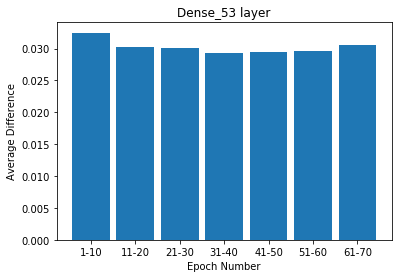

In [28]:
epoch_number=np.arange(1,71,10)
#plt.figure(figsize=(10,4))
plt.bar(epoch_number,mat_4,width=8.5)
plt.xlabel('Epoch Number')
plt.ylabel('Average Difference')
plt.xticks(epoch_number,('1-10','11-20','21-30','31-40','41-50','51-60','61-70'))
plt.title('Dense_53 layer')
plt.savefig('./Graphs/weights_variation_53_seed.svg',format='svg',dpi=1200)

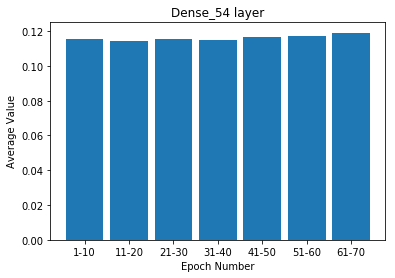

In [29]:
epoch_number=np.arange(1,71,10)
#plt.figure(figsize=(10,4))
plt.bar(epoch_number,mat_6,width=8.5)
plt.xlabel('Epoch Number')
plt.ylabel('Average Value')
plt.xticks(epoch_number,('1-10','11-20','21-30','31-40','41-50','51-60','61-70'))
plt.title('Dense_54 layer')
plt.savefig('./Graphs/weights_variation_54_seed.svg',format='svg',dpi=1200)